<a href="https://colab.research.google.com/github/raghavendra-gunnai/EVA4/blob/master/Session12_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchsummary
!pip install torchvision
!pip install albumentations==0.4.5
!pip install torch-lr-finder
!pip install torch-lr-finder -v --global-option="amp"
!pip install tqdm


/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-1xz8r7fl
Created temporary directory: /tmp/pip-req-tracker-ghhhggya
Created requirements tracker '/tmp/pip-req-tracker-ghhhggya'
Created temporary directory: /tmp/pip-install-9pqf1dsa
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-ghhhggya'


In [0]:
from torchsummary import summary
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import torch.nn.functional as F
from albumentations.pytorch.transforms import ToTensor

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/EVA4/s12')
!ls '/content/drive/My Drive/EVA4/s12'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dogs.json	   __pycache__		      tiny_imagenet.py
lr_finder_s12.py   resnet18_arch.py	      train_test_s12.py
lrfinder_utils.py  resnet18.py		      train_test_utils.py
lr_rangefinder.py  tiny_dataloader.py
lr_utils.py	   tiny_imagenet_download.py


In [4]:
from tiny_imagenet_download import download_image, segregate
import lr_utils
import resnet18
import lr_rangefinder
import lr_finder_s12
import train_test_s12 as trainer

  pip install torch-lr-finder -v --global-option="amp"
  pip install torch-lr-finder -v --global-option="amp"


In [5]:
# maps = segregate()
# maps,classes = lr_utils.getclass_level()

! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'

fatal: destination path 'IMagenet' already exists and is not an empty directory.
test  train  val  wnids.txt  words.txt


In [0]:
import torch
import tiny_dataloader
path = 'IMagenet/tiny-imagenet-200/train'
path_val = 'IMagenet/tiny-imagenet-200/val'

train, test = tiny_dataloader.get_train_test_data(path)

train_loader = torch.utils.data.DataLoader(train, batch_size=512,
                                          shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test, batch_size=512,
                                         shuffle=False, num_workers=4)

In [0]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = resnet18.ResNet18(200).to(device)


Learning rate search finished. See the graph with {finder_name}.plot()


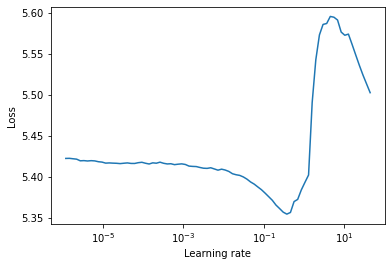

In [8]:
import torch.nn as nn
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=1e-7,  weight_decay=1e-2)
criterion = nn.CrossEntropyLoss()

lrfinder = lr_finder_s12.LRFinder(model, optimizer, criterion, device)
lrfinder.range_test(train_loader, end_lr=100, num_iter=100)
lrfinder.plot()
lrfinder.reset()

In [9]:
from torchsummary import summary
summary(model, input_size=(3, 64, 64))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [10]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

train_losses = []
test_losses = []
train_acc = []
test_acc = []
model = resnet18.ResNet18(200).to(device)

optimizer = optim.SGD(model.parameters(), lr=0.07, momentum=0.9, nesterov=True)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2)

EPOCHS = 50
trainer.run(model, device, train_loader, test_loader, optimizer, scheduler, EPOCHS, train_losses, train_acc, test_losses, test_acc)

  0%|          | 0/137 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.375532150268555 Batch_id=136 Accuracy=4.98: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 2346/30000 (7.82%)

EPOCH: 1


Loss=3.8158974647521973 Batch_id=136 Accuracy=13.97: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 4078/30000 (13.59%)

EPOCH: 2


Loss=3.3244266510009766 Batch_id=136 Accuracy=21.63: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 5658/30000 (18.86%)

EPOCH: 3


Loss=2.920799493789673 Batch_id=136 Accuracy=27.45: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6318/30000 (21.06%)

EPOCH: 4


Loss=3.0076138973236084 Batch_id=136 Accuracy=32.14: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8966/30000 (29.89%)

EPOCH: 5


Loss=2.7245006561279297 Batch_id=136 Accuracy=36.10: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 9817/30000 (32.72%)

EPOCH: 6


Loss=2.5749189853668213 Batch_id=136 Accuracy=39.56: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 9633/30000 (32.11%)

EPOCH: 7


Loss=2.364219903945923 Batch_id=136 Accuracy=42.35: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 10665/30000 (35.55%)

EPOCH: 8


Loss=2.2792019844055176 Batch_id=136 Accuracy=45.04: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 11268/30000 (37.56%)

EPOCH: 9


Loss=2.1334500312805176 Batch_id=136 Accuracy=47.38: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 11359/30000 (37.86%)

EPOCH: 10


Loss=1.9491022825241089 Batch_id=136 Accuracy=49.50: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 11335/30000 (37.78%)

EPOCH: 11


Loss=1.9072291851043701 Batch_id=136 Accuracy=51.36: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 12090/30000 (40.30%)

EPOCH: 12


Loss=1.785772442817688 Batch_id=136 Accuracy=53.83: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 12977/30000 (43.26%)

EPOCH: 13


Loss=1.9165470600128174 Batch_id=136 Accuracy=55.53: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 12989/30000 (43.30%)

EPOCH: 14


Loss=1.8312064409255981 Batch_id=136 Accuracy=57.54: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 13611/30000 (45.37%)

EPOCH: 15


  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 12995/30000 (43.32%)

EPOCH: 16


Loss=1.5417386293411255 Batch_id=136 Accuracy=61.00: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 14007/30000 (46.69%)

EPOCH: 17


Loss=1.5361337661743164 Batch_id=136 Accuracy=62.85: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 12986/30000 (43.29%)

EPOCH: 18


Loss=1.4189410209655762 Batch_id=136 Accuracy=64.30: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 13691/30000 (45.64%)

EPOCH: 19


Loss=1.3797093629837036 Batch_id=136 Accuracy=66.12: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 14275/30000 (47.58%)

EPOCH: 20


Loss=0.8729239702224731 Batch_id=136 Accuracy=75.14: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16569/30000 (55.23%)

EPOCH: 21


Loss=0.7068386673927307 Batch_id=136 Accuracy=78.31: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16735/30000 (55.78%)

EPOCH: 22


Loss=0.7471683621406555 Batch_id=136 Accuracy=79.23: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16692/30000 (55.64%)

EPOCH: 23


Loss=0.8267601132392883 Batch_id=136 Accuracy=80.15: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16741/30000 (55.80%)

EPOCH: 24


Loss=0.6963098645210266 Batch_id=136 Accuracy=80.48: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16696/30000 (55.65%)

EPOCH: 25


Loss=0.6789681315422058 Batch_id=136 Accuracy=81.87: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16790/30000 (55.97%)

EPOCH: 26


Loss=0.6741117238998413 Batch_id=136 Accuracy=82.18: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16835/30000 (56.12%)

EPOCH: 27


Loss=0.8403627276420593 Batch_id=136 Accuracy=82.41: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16849/30000 (56.16%)

EPOCH: 28


Loss=0.7603152990341187 Batch_id=136 Accuracy=82.56: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16856/30000 (56.19%)

EPOCH: 29


Loss=0.7691128849983215 Batch_id=136 Accuracy=82.53: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16835/30000 (56.12%)

EPOCH: 30


Loss=0.6070330142974854 Batch_id=136 Accuracy=82.56: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16825/30000 (56.08%)

EPOCH: 31


Loss=0.8057509064674377 Batch_id=136 Accuracy=82.61: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16841/30000 (56.14%)

EPOCH: 32


Loss=0.7485290169715881 Batch_id=136 Accuracy=82.63: 100%|██████████| 137/137 [05:33<00:00,  2.43s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16842/30000 (56.14%)

EPOCH: 33


Loss=0.6978418231010437 Batch_id=136 Accuracy=82.72: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16854/30000 (56.18%)

EPOCH: 34


Loss=0.8035469055175781 Batch_id=136 Accuracy=82.54: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16844/30000 (56.15%)

EPOCH: 35


Loss=0.5992006659507751 Batch_id=136 Accuracy=82.61: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16848/30000 (56.16%)

EPOCH: 36


Loss=0.5915260910987854 Batch_id=136 Accuracy=82.62: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16833/30000 (56.11%)

EPOCH: 37


Loss=0.7016185522079468 Batch_id=136 Accuracy=82.51: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16856/30000 (56.19%)

EPOCH: 38


Loss=0.8647876977920532 Batch_id=136 Accuracy=82.82: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16850/30000 (56.17%)

EPOCH: 39


Loss=0.7865356206893921 Batch_id=136 Accuracy=82.53: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16860/30000 (56.20%)

EPOCH: 40


Loss=0.7163386940956116 Batch_id=136 Accuracy=82.66: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16837/30000 (56.12%)

EPOCH: 41


Loss=0.6813265085220337 Batch_id=136 Accuracy=82.53: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16843/30000 (56.14%)

EPOCH: 42


Loss=0.6820271015167236 Batch_id=136 Accuracy=82.56: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16834/30000 (56.11%)

EPOCH: 43


Loss=0.6998477578163147 Batch_id=136 Accuracy=82.59: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16854/30000 (56.18%)

EPOCH: 44


Loss=0.6769838333129883 Batch_id=136 Accuracy=82.55: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16842/30000 (56.14%)

EPOCH: 45


Loss=0.6791136860847473 Batch_id=136 Accuracy=82.49: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16851/30000 (56.17%)

EPOCH: 46


Loss=0.7723358869552612 Batch_id=136 Accuracy=82.69: 100%|██████████| 137/137 [05:33<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16852/30000 (56.17%)

EPOCH: 47


Loss=0.8172797560691833 Batch_id=136 Accuracy=82.65: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16864/30000 (56.21%)

EPOCH: 48


Loss=0.7371461391448975 Batch_id=136 Accuracy=82.54: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]
  0%|          | 0/137 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 16830/30000 (56.10%)

EPOCH: 49


Loss=0.7403972744941711 Batch_id=136 Accuracy=82.38: 100%|██████████| 137/137 [05:34<00:00,  2.44s/it]



Test set: Average loss: 0.0037, Accuracy: 16861/30000 (56.20%)

